# Task 4: SALES PREDICTION USING PYTHON

- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

- In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

# Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
     

In [5]:
# Load the dataset
df = pd.read_csv("advertising.csv")
     

In [7]:
# Display the first few rows of the dataframe
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [9]:
# Get a summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [13]:
df.shape
     


(200, 4)

In [15]:
# Check for missing values
print(df.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


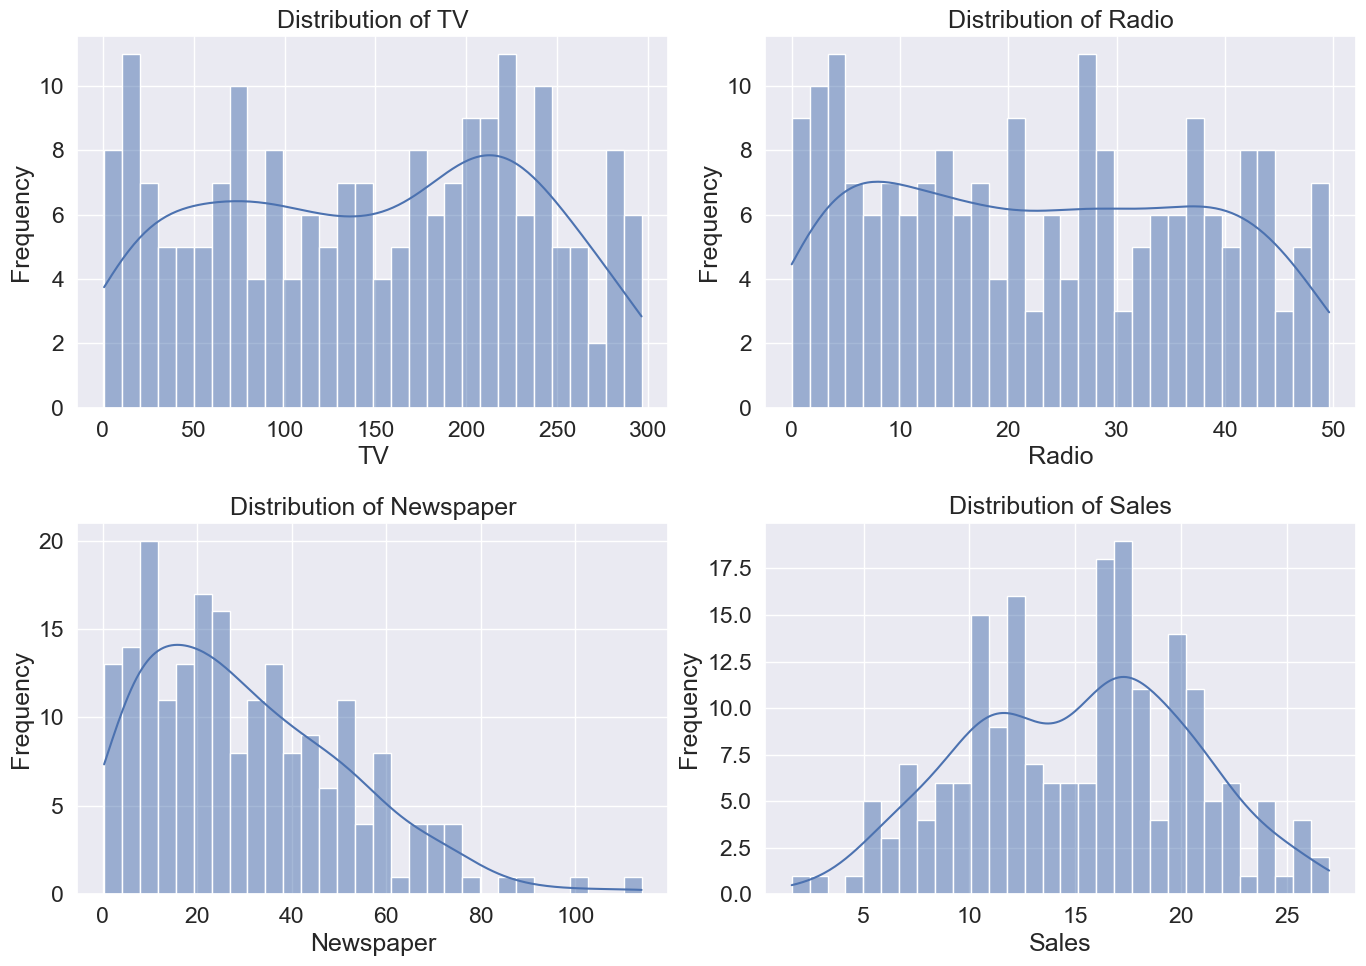

In [17]:
# Visualize the data
# Histograms for each variable
features = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

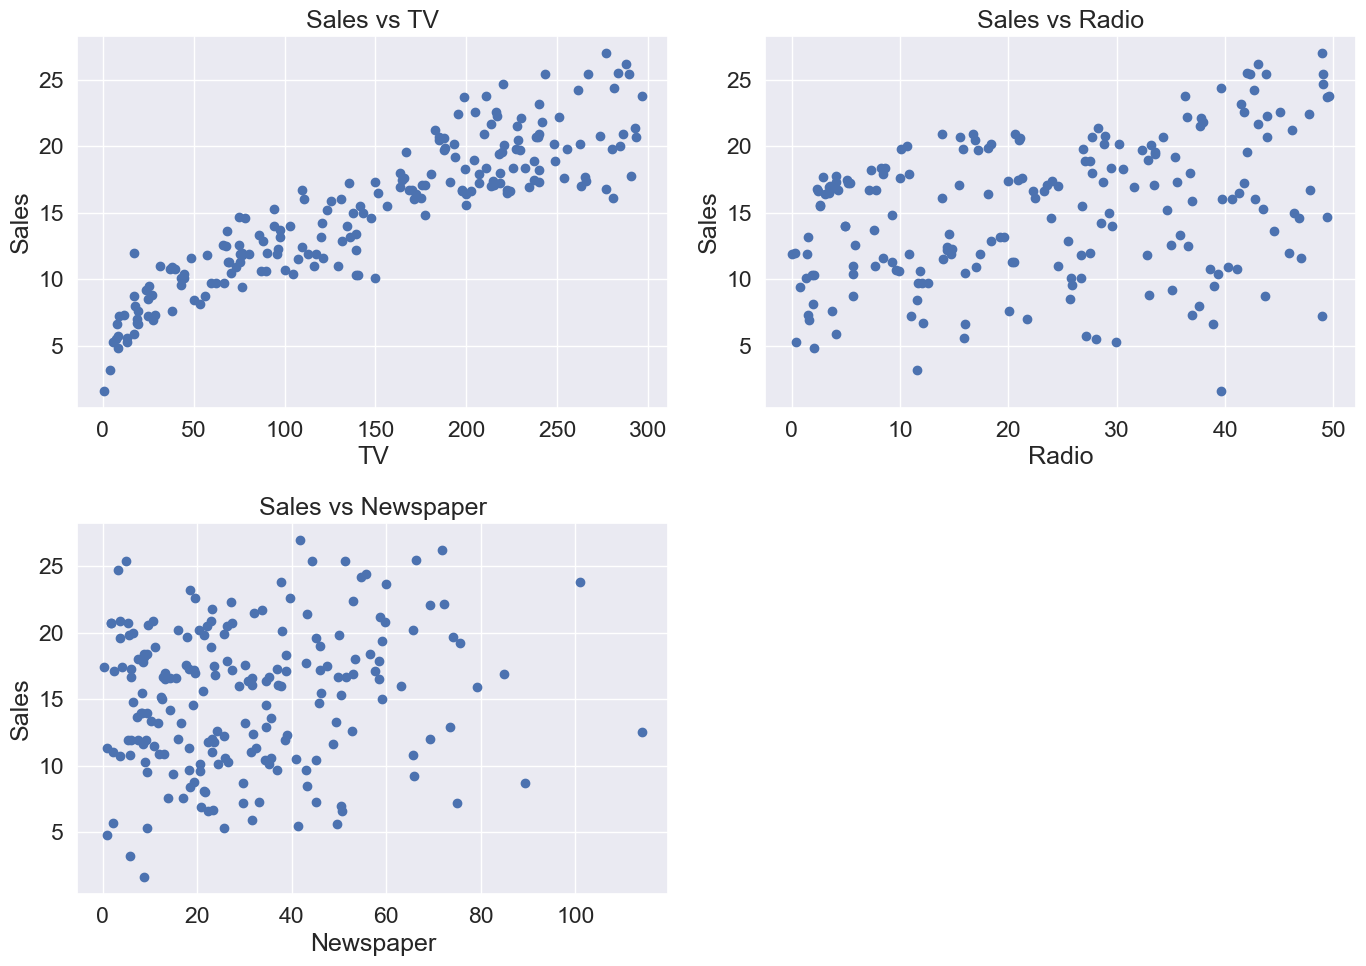

In [19]:
# Scatter plots of each feature against the target variable (Sales)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features[:-1]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feature], df['Sales'])
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')

plt.tight_layout()
plt.show()

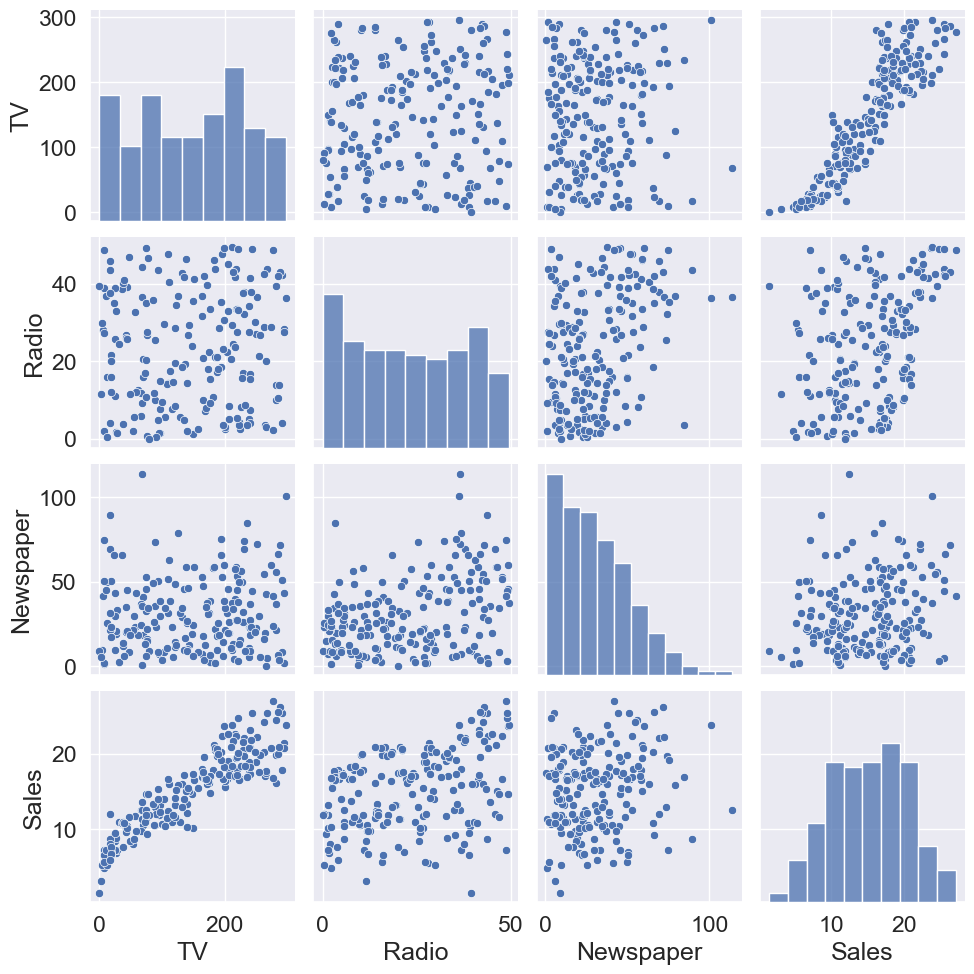

In [21]:
# Visualize the data using pairplot
sns.pairplot(df)
plt.show()

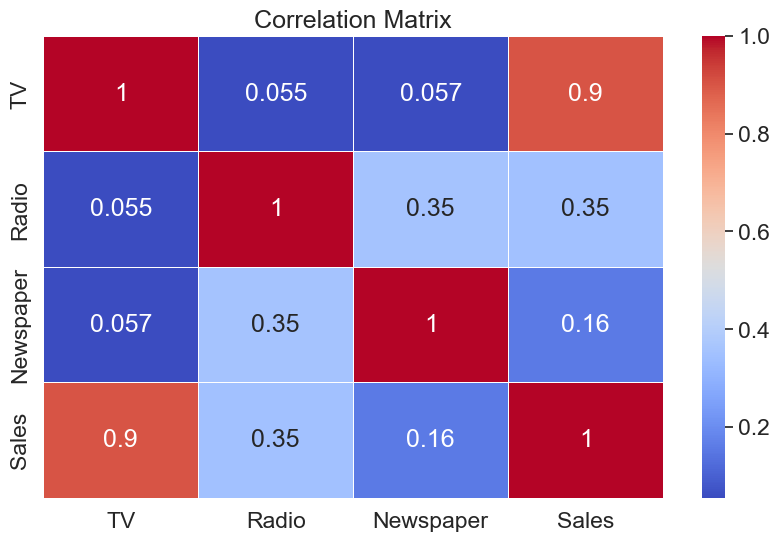

In [23]:

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
     


In [25]:

# Split the data into features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']
     

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

# Initialize the model
model = LinearRegression()
     

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)
     

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print('-' * 90)

Mean Absolute Error: 1.274826210954934
Mean Squared Error: 2.907756910271091
R-squared: 0.9059011844150826
Mean Absolute Percentage Error (MAPE): 0.10880888971170641
------------------------------------------------------------------------------------------


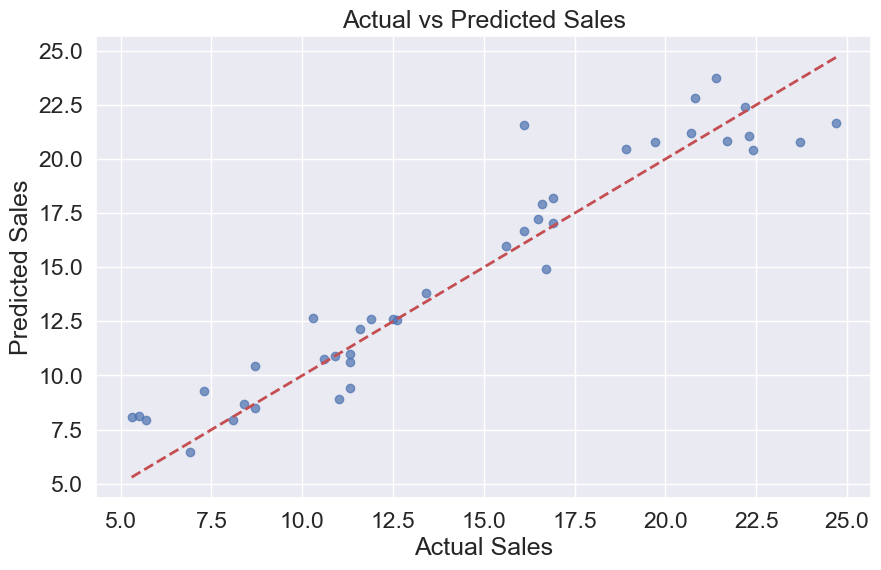

In [29]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

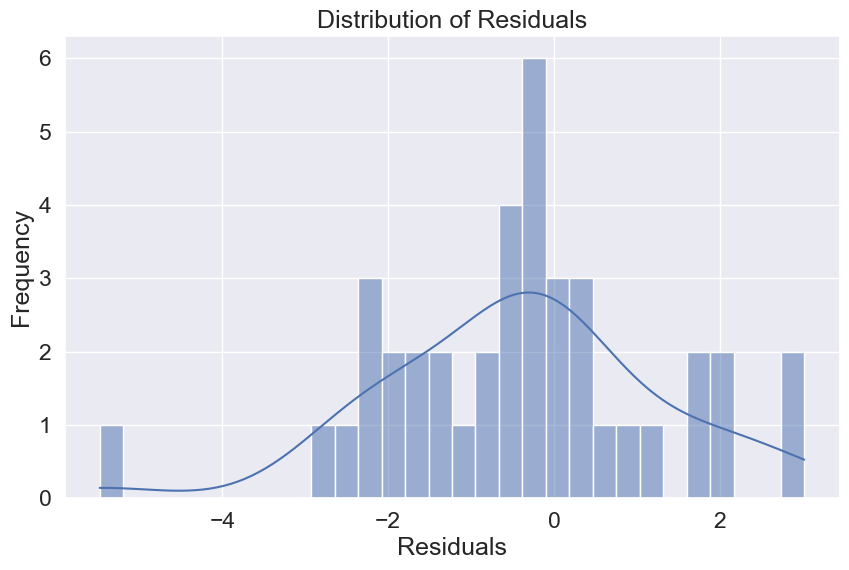

In [31]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()